<a href="https://colab.research.google.com/github/Darshitavijay/Airline-fair-prediction/blob/main/Airline_fare_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [476]:
#IMPORTING NECESSARY LIBRARIES 
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [477]:
train_data=pd.read_excel('/content/drive/MyDrive/Data Science Real world projects Course /Airfare prediction /Data_Train.xlsx')

In [478]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [479]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


DATA CLEANING 

In [480]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [481]:
train_data.shape

(10683, 11)

In [482]:
#few missing values so we can delete it 
#find the row where the null value is 
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [483]:
train_data.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [484]:
data=train_data.copy()

In [485]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [486]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [487]:
#function to convert datatype into datetime format 
def  change_into_datetime(col):
  data[col]=pd.to_datetime(data[col])


In [488]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [489]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(feature)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide format or speci

In [490]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [491]:
#to find the oldest date 
data['Date_of_Journey'].min()
#in all the rows 2019 year is common 

Timestamp('2019-01-03 00:00:00')

In [492]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [493]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [494]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [495]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 05:50:00,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-19 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [496]:
 data.drop('Date_of_Journey',axis=1,inplace=True)

In [497]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 05:50:00,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [498]:
def extract_hour_min(col):
  data[col+'_hour']=data[col].dt.hour
  data[col+'_minute']=data[col].dt.minute
  data.drop(col,axis=1,inplace=True)
  return data.head(2)

In [499]:
extract_hour_min('Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [500]:
extract_hour_min('Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [501]:
#analysing the timr of departure and arrival , to set the treshold value 
#this can be implemented using simple elif 
def flight_dep_time(x):
  if (x> 4) and (x<=8):
    return 'Early Morning'
  elif (x>8) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=16):
    return 'Noon'
  elif (x>16) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else:
    return 'Late Night'


In [502]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2210
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<Axes: >

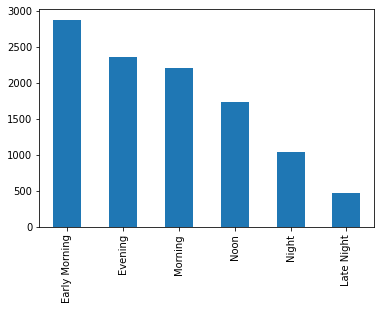

In [503]:
#visualizing with basic bar plot 
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [504]:
#to make it an interactive barplot 
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [505]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [506]:
import plotly
import cufflinks as cf 
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [507]:
#data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [508]:
#to extract meaningful features 
data.head(5)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [509]:
def preprocess_duration(x):
  if 'h' not in x:
   x= '0h '+x
  elif  'm' not in x:
    x=x+ ' 0m'
  return x

In [510]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [511]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [512]:
data['Duration'][0].split(' ')[0]

'2h'

In [513]:
data['Duration'][0].split(' ')[1]

'50m'

In [514]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [515]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [516]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [517]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [518]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [519]:
#analyse whether duration impacts price or not 
#which city has the maximum final destination 
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)



In [520]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


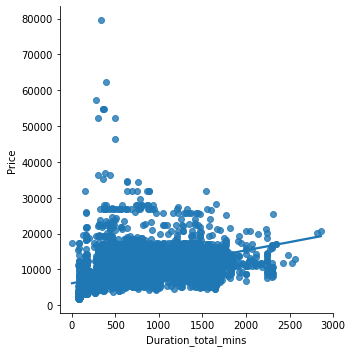

In [521]:
#lmplot-combination of regression plot and scatter plot
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [522]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: >

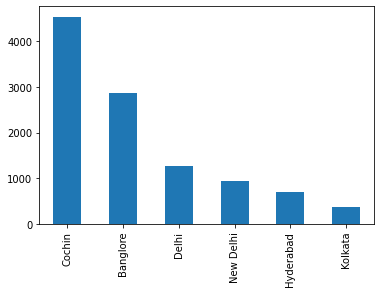

In [523]:
data['Destination'].value_counts().plot(kind='bar')

<Axes: ylabel='Destination'>

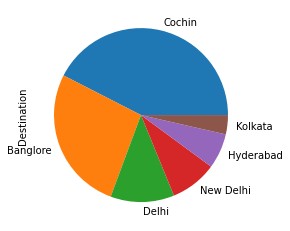

In [524]:
data['Destination'].value_counts().plot(kind='pie')

In [525]:
#Bi-variate analysis 
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [526]:
#create a filter to get data from a particular airlines 
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

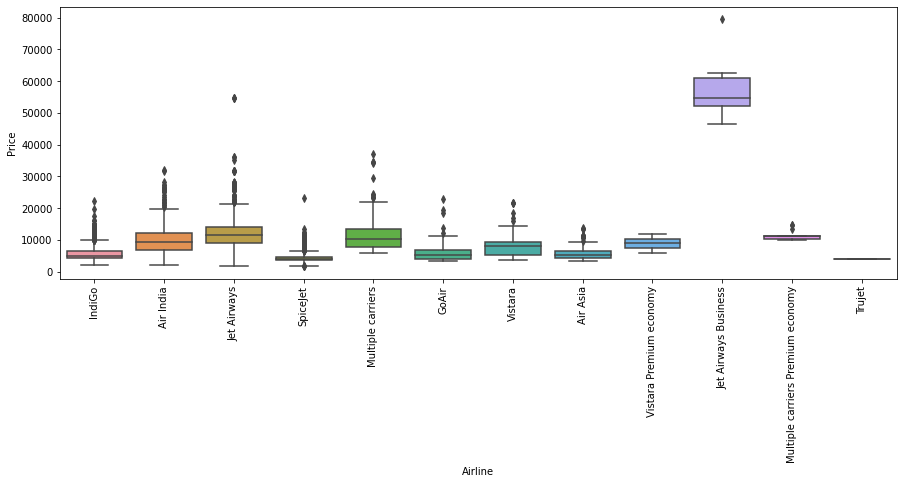

In [527]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline', data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

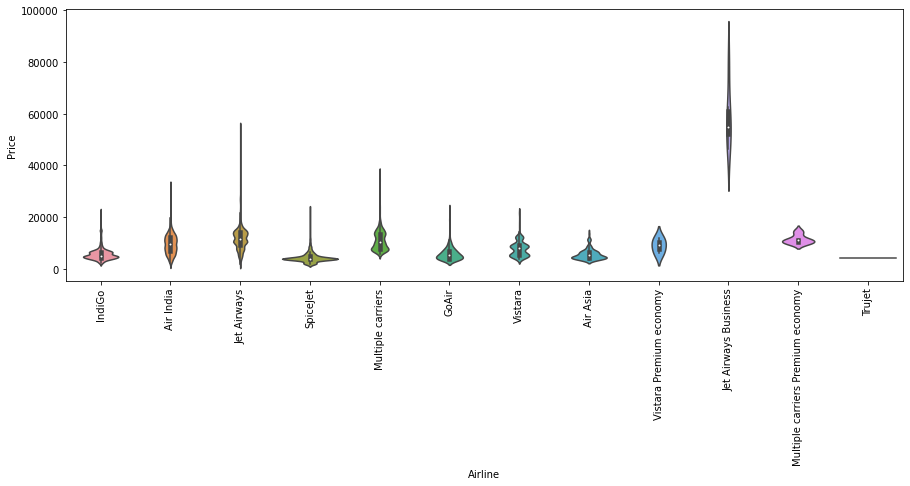

In [528]:
#boxplot along with distribution of data-violinplot
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline', data=data)
plt.xticks(rotation='vertical')

APPLYING ONE HOT ENCODING 

In [529]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [530]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [531]:
#to get info in form of percentage 
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

In [532]:
np.round(data['Additional_Info'].value_counts()/len(data)*100)

No info                         78.0
In-flight meal not included     19.0
No check-in baggage included     3.0
1 Long layover                   0.0
Change airports                  0.0
Business class                   0.0
No Info                          0.0
1 Short layover                  0.0
Red-eye flight                   0.0
2 Long layover                   0.0
Name: Additional_Info, dtype: float64

In [533]:
#dropping columns because they do not affect the data prediction
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [534]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [535]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


In [536]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [537]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [538]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [539]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object

In [540]:
#ordinal data(ranking)- label encoder 
#nominal data(no order/ ranking )-one hot encoding 
data['Source'].apply(lambda x: 1 if  x=='Banglore'  else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10683, dtype: int64

In [541]:
for category in data['Source'].unique():
 data['Source_'+category]= data['Source'].apply(lambda x: 1 if  x==category  else 0)


In [542]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


TARGET GUIDING ENCODING 

In [543]:

airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [544]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [545]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [546]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [547]:
data['Airline']=data['Airline'].map(dict1)

In [548]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10683, dtype: int64

In [549]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


In [550]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [551]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [552]:
dest=airlines=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [553]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [554]:
dict2={key:index for index,key in enumerate(dest,0)}

In [555]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [556]:
data['Destination']=data['Destination'].map(dict2)

In [557]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10683, dtype: int64

In [558]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [559]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [560]:
stops={'non-stop':0, '2 stops':2,  '1 stop':1,  ' 3 stops':3,  '4 stops':4}

In [561]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [562]:
data['Total_Stops'] = data['Total_Stops'].fillna(data['Total_Stops'].median())

In [563]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Total_Stops            0
Price                  0
journey_day            0
journey_month          0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
Duration_hours         0
Duration_mins          0
Source_Banglore        0
Source_Kolkata         0
Source_Delhi           0
Source_Chennai         0
Source_Mumbai          0
dtype: int64

In [564]:
#how to handle outliers 
def plot(data,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(data[col],ax=ax1)
  sns.boxplot(data[col],ax=ax2)
  sns.distplot(data[col],ax=ax3,kde=False)


<ipython-input-564-8929a9f98c2f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-564-8929a9f98c2f>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




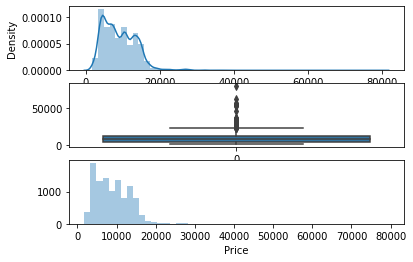

In [565]:
plot(data,'Price')

In [566]:
#replace the outlier value with median value
data['Price']=np.where(data['Price']>35000,data['Price'].median(),data['Price'])

<ipython-input-564-8929a9f98c2f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-564-8929a9f98c2f>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




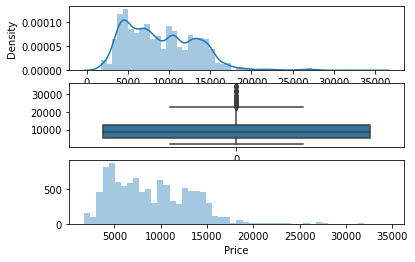

In [567]:
plot(data,'Price')

FEATURE SELECTION

In [568]:
#Feature selection 
data.head(2)
#source and duration is already one hot ecoded 

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0.0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2.0,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [569]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0.0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2.0,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [570]:
data.dtypes


Airline                  int64
Destination              int64
Total_Stops            float64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [571]:
#feature selection - in general it is about selecting features which have good relation and contribute most to the target feature

techniques:
1. selectkbest
2. f-reg
3. mutual info regression


In [572]:
from sklearn.feature_selection import mutual_info_regression


In [573]:
x=data.drop(['Price'],axis=1)

In [574]:
y=data['Price']

In [575]:
x.dtypes

Airline                  int64
Destination              int64
Total_Stops            float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [576]:
mutual_info_regression(x,y)

array([1.30998858, 1.06518103, 0.7806487 , 0.61863162, 0.42051076,
       0.92849422, 0.76051208, 1.13421877, 0.89544235, 1.11414226,
       0.68252187, 0.3836771 , 0.45548909, 0.5125613 , 0.1392014 ,
       0.18364066])

In [577]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=['importance']

In [578]:
imp.sort_values(by='importance',ascending=False)

,importance
Airline,1.314674
Arrival_Time_hour,1.143680
Duration_hours,1.129413
Destination,1.069343
Dep_Time_hour,0.920873
Arrival_Time_minute,0.912773
Total_Stops,0.784589
Dep_Time_minute,0.756118
Duration_mins,0.685503
journey_day,0.611187


BUILDING THE RANDOM FOREST MODEL 

In [579]:
#BUILDING THE RANDOM  FOREST MODEL 
from sklearn.model_selection import train_test_split

In [580]:
x_train,x_test,y_train,y_test=train_test_split( x,y, test_size=0.33, random_state=42 )

In [581]:
from sklearn.ensemble import RandomForestRegressor

In [582]:
ml_model=RandomForestRegressor()

In [583]:
model=ml_model.fit(x_train,y_train)

In [584]:
y_pred=model.predict(x_test)

In [585]:
y_pred

array([13963.1225    ,  6257.37      , 12496.2225    , ...,
        9625.12      , 13084.7525    , 10673.35716667])

In [586]:
y_pred.shape

(3526,)

In [587]:
len(x_test)

3526

In [588]:
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [589]:
import pickle

In [590]:
file=open('rf_random.pkl','wb')

In [591]:
pickle.dump(model,file)

In [592]:
model=open('rf_random.pkl','rb')

In [593]:
forest=pickle.load(model)

CALCULATING ERROR 

In [594]:
forest.predict(x_test)

array([13963.1225    ,  6257.37      , 12496.2225    , ...,
        9625.12      , 13084.7525    , 10673.35716667])

In [595]:
def mape(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)

  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [596]:
mape(y_test,forest.predict(x_test))

13.68457751949657

In [604]:
def prediction(ml_model):

  model=ml_model.fit(x_train,y_train)
  print('Training_score:{}'.format(model.score(x_train,y_train)))
  prediction=model.predict(x_test)
  print('Predictions are : {}'.format(prediction))
  print('\n')

  from sklearn import metrics
  r2_score=metrics.r2_score(y_test,y_pred)
  print('r2_score:{}'.format(r2_score))
  print('MSE:', metrics.mean_squared_error(y_test,y_pred))
  print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
  print('MAPE:', metrics.mean_squared_error(y_test,y_pred))
  sns.distplot(y_test-y_pred)
  

Training_score:0.9559760645921647
Predictions are : [14102.61416667  6551.73       13093.1675     ...  9330.75
 12769.81083333 10806.51309524]


r2_score:0.7996614830559624
MSE: 3798563.2398861255
MAE: 1207.116411593244
RMSE: 1948.9903129277286
MAPE: 3798563.2398861255


<ipython-input-604-457b3f9d1d51>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




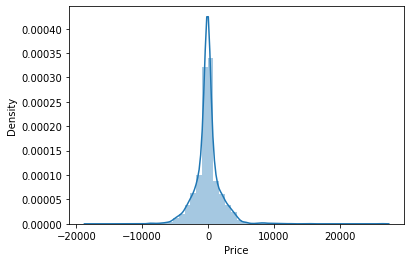

In [605]:
prediction(RandomForestRegressor())

HYPERTUNING THE PARAMETERS

In [606]:
from sklearn.model_selection import RandomizedSearchCV

In [607]:
reg_rf=RandomForestRegressor()

In [609]:
np.linspace(start=1000, stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [610]:
n_estimators=[int(x) for x  in np.linspace(start=1000, stop=1200,num=6) ]

max_features=['auto','sqrt']

max_depth=[int(x) for x  in np.linspace(start=5, stop=30,num=4) ]

min_samples_split=[5,10,15,100]


In [612]:
random_grid={
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split
}

In [613]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [615]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [616]:
rf_Random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [617]:
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [618]:
pred2=rf_Random.predict(x_test)

In [619]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8208295975069704